In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [141]:
df=pd.read_csv('boston.csv')
print("--- Dataset Head ---")
df.head()

--- Dataset Head ---


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [143]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [144]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [145]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns

In [146]:
print(numerical_cols)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [147]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

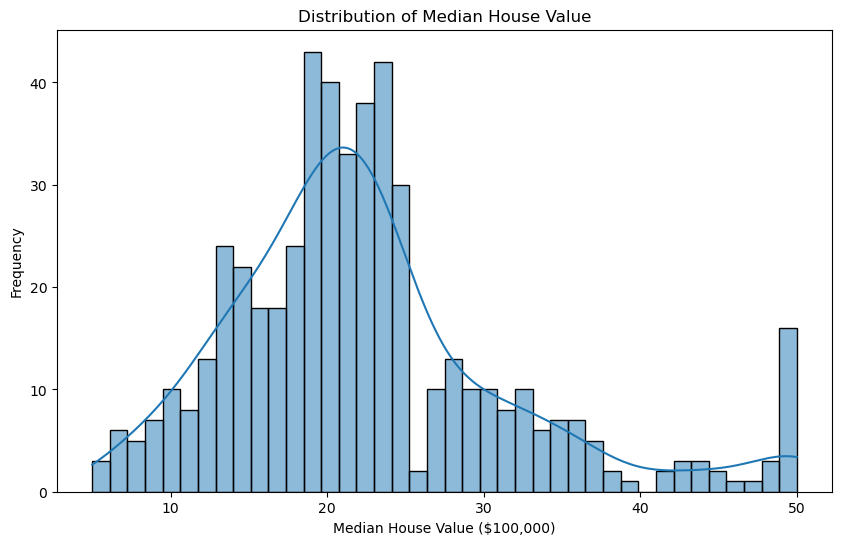

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True, bins=40)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.ylabel('Frequency')
plt.show()

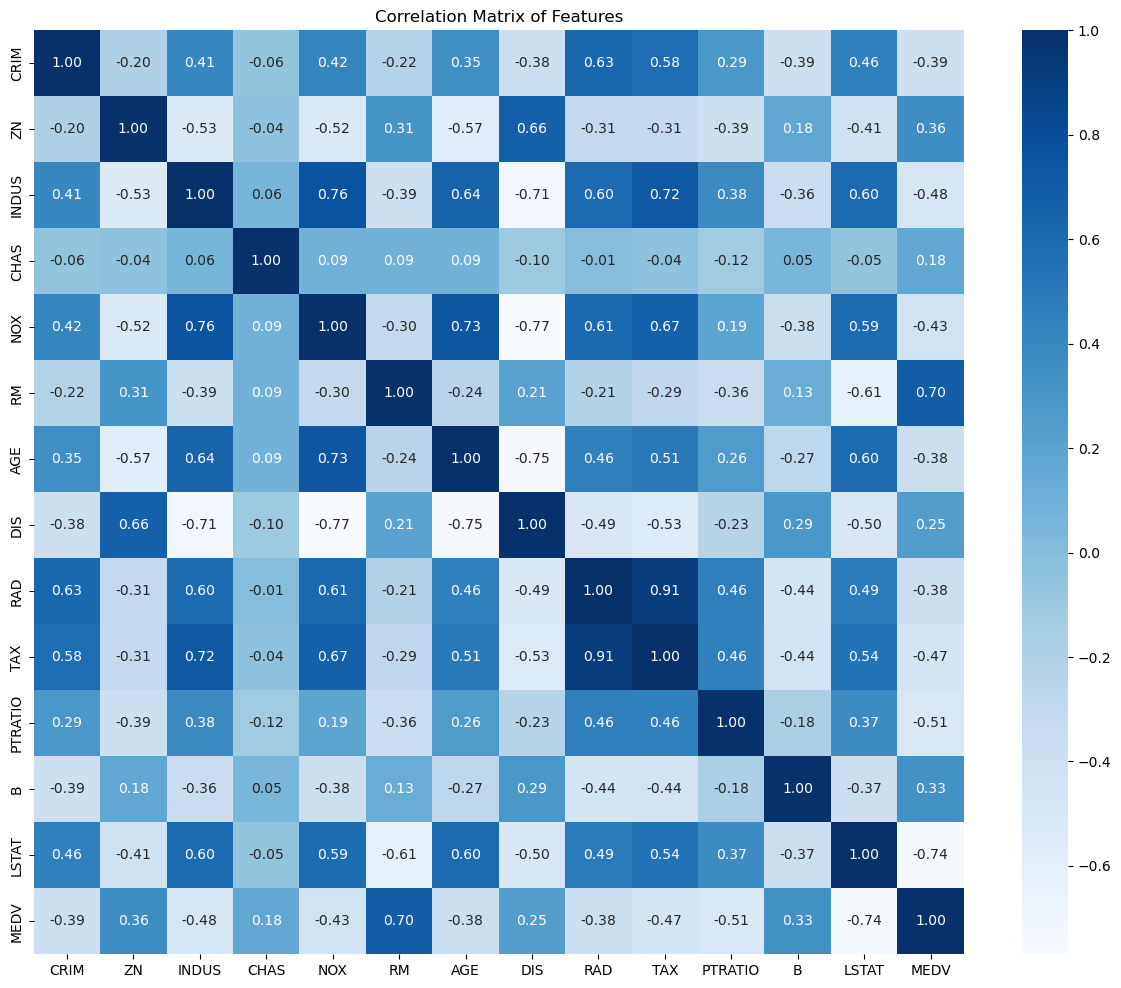

In [149]:
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### We found that the Median Value of Houses has a strong positive correlations with RM(average number of rooms) 0.7

### Also LSTAT(lower status of population) has a strong negative correlation with MEDV(-0.74)


--- Plotting Scatter Plots for High Correlation Features vs MEDV ---


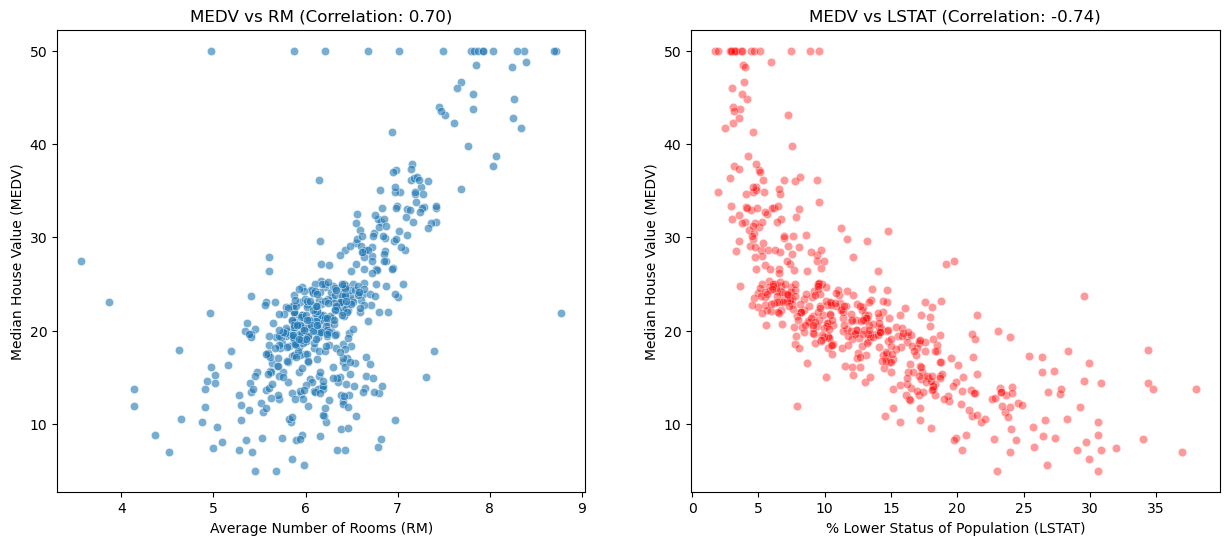

In [150]:
high_corr=['RM','LSAT']
target='MEDV'
print(f"--- Plotting Scatter Plots for High Correlation Features vs {target} ---")
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.scatterplot(data=df,x='RM',y=target,alpha=0.6)
plt.title(f'{target} vs RM (Correlation: {correlation_matrix.loc["RM", target]:.2f})')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')

plt.subplot(1,2,2)
sns.scatterplot(data=df,x='LSTAT',y=target,alpha=0.4,color='red')
plt.title(f'{target} vs LSTAT (Correlation: {correlation_matrix.loc["LSTAT", target]:.2f})')
plt.xlabel('% Lower Status of Population (LSTAT)')
plt.ylabel('Median House Value (MEDV)')


plt.show()

### Splitting data into training and test set

In [151]:
numerical_cols=numerical_cols.drop('MEDV')
numerical_cols=numerical_cols.drop('CHAS')
print(numerical_cols)

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
sc=StandardScaler()
sc.fit(X_train[numerical_cols])
X_train[numerical_cols]=sc.transform(X_train[numerical_cols])
X_test[numerical_cols]=sc.transform(X_test[numerical_cols])
print(X_train)

         CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
42  -0.389249 -0.495593 -0.609290     0 -0.899583 -0.144968 -2.150030   
58  -0.387832  0.579239 -0.869526     0 -0.856756 -0.179832 -1.357820   
385  1.435550 -0.495593  1.026692     0  1.258877 -1.440773  1.057367   
78  -0.398558 -0.495593  0.256216     0 -0.993801 -0.053448 -0.499009   
424  0.557683 -0.495593  1.026692     0  0.265300 -1.022396  0.093395   
..        ...       ...       ...   ...       ...       ...       ...   
255 -0.400855  2.943870 -1.087365     0 -1.379241 -0.570608 -1.711861   
72  -0.394707 -0.495593 -0.039109     0 -1.199369 -0.296048 -2.107965   
396  0.238040 -0.495593  1.026692     0  1.198920  0.197869  0.983754   
235 -0.368566 -0.495593 -0.713092     0 -0.394229 -0.265541 -0.225592   
37  -0.395966 -0.495593 -0.748180     0 -0.462752 -0.608378 -0.926662   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
42   0.894455 -0.746330 -1.008508 -0.248578  0.286742 -0.

### Implementing multiple linear regression

In [153]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predicting X_test values

In [154]:
y_pred=regressor.predict(X_test)
y_test=np.array(y_test)
y_pred=np.array(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[32.65503184 28.2       ]
 [28.0934953  23.9       ]
 [18.02901829 16.6       ]
 [21.47671576 22.        ]
 [18.8254387  20.8       ]
 [19.87997758 23.        ]
 [32.42014863 27.9       ]
 [18.06597765 14.5       ]
 [24.42277848 21.5       ]
 [27.00977832 22.6       ]
 [27.04081017 23.7       ]
 [28.75196794 31.2       ]
 [21.15677699 19.3       ]
 [26.85200196 19.4       ]
 [23.38835945 19.4       ]
 [20.66241266 27.9       ]
 [17.33082198 13.9       ]
 [38.24813601 50.        ]
 [30.50550873 24.1       ]
 [ 8.74436733 14.6       ]
 [20.80203902 16.2       ]
 [16.26328126 15.6       ]
 [25.21805656 23.8       ]
 [24.85175752 25.        ]
 [31.384365   23.5       ]
 [10.71311063  8.3       ]
 [13.80434635 13.5       ]
 [16.65930389 17.5       ]
 [36.52625779 43.1       ]
 [14.66750528 11.5       ]
 [21.12114902 24.1       ]
 [13.95558618 18.5       ]
 [43.16210242 50.        ]
 [17.97539649 12.6       ]
 [21.80116017 19.8       ]
 [20.58294808 24.5       ]
 [17.59938821 14.9       ]
 

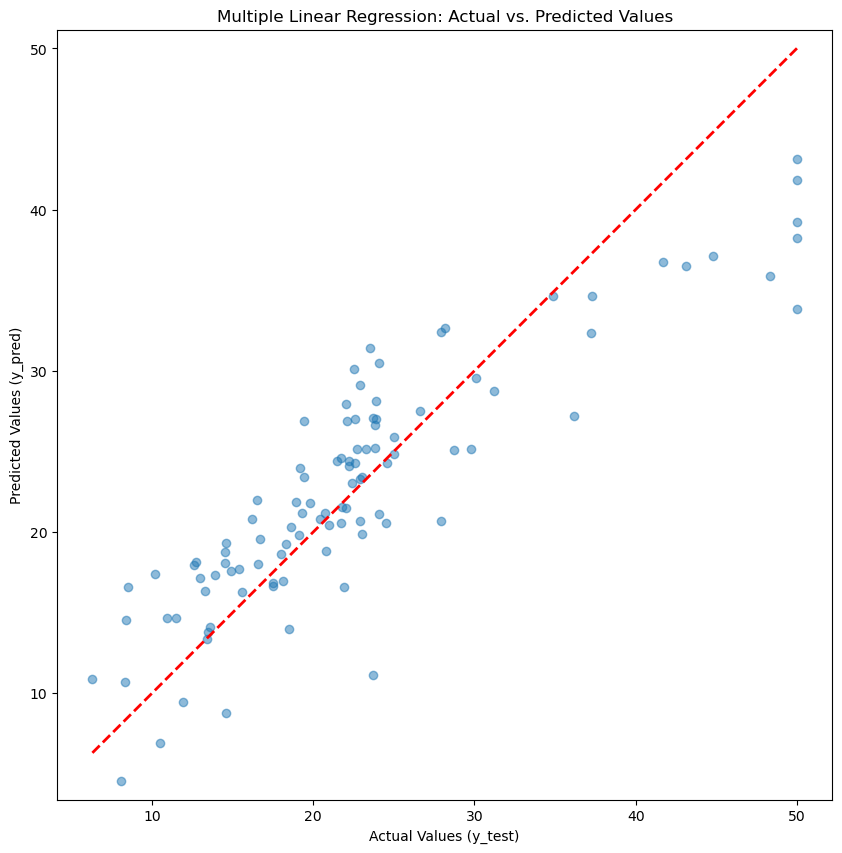

In [155]:
model_name = "Multiple Linear Regression"
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title(f'{model_name}: Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')

plt.axis('equal')
plt.show()

## Residual Plot

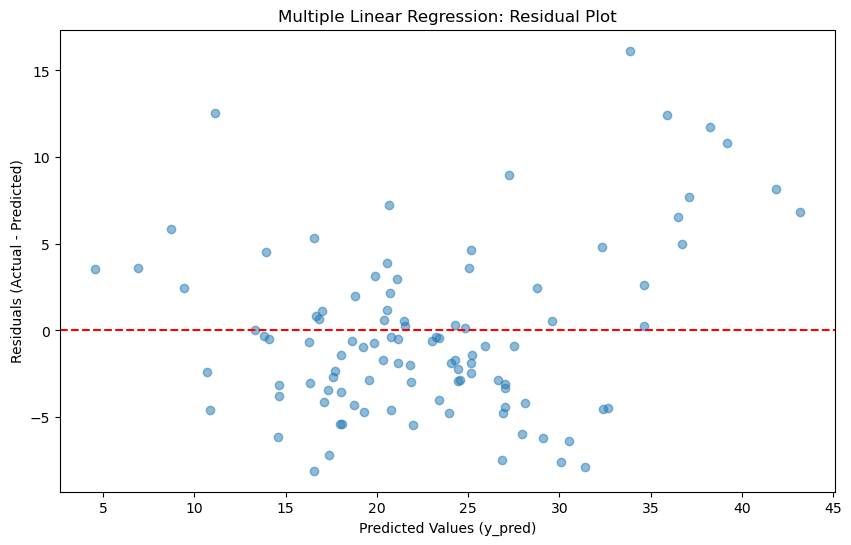

In [156]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title(f'{'Multiple Linear Regression'}: Residual Plot')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (Actual - Predicted)')

plt.show()

In [159]:
print(f"R2 Score: {r2_score(y_test,y_pred):.2f}")
mse=(mean_squared_error(y_test,y_pred))
print(f"Mean Squared Error(MSE): {mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")

R2 Score: 0.76
Mean Squared Error(MSE): 23.38
Root Mean Squared Error: 4.84


# Conclusion
### Multiple Regression Model gave us an R^2 Score of 0.76 which is not great but okay. 